# Load and Visualize Data

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Variable
from torchvision import transforms, models
import cv2
from IPython.display import clear_output
from PIL import Image
import random

%matplotlib inline

In [2]:
key_pts_frame = pd.read_csv('data/training_frames_keypoints.csv')
key_pts_frame.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,126,127,128,129,130,131,132,133,134,135
0,Luis_Fonsi_21.jpg,45.0,98.0,47.0,106.0,49.0,110.0,53.0,119.0,56.0,...,83.0,119.0,90.0,117.0,83.0,119.0,81.0,122.0,77.0,122.0
1,Lincoln_Chafee_52.jpg,41.0,83.0,43.0,91.0,45.0,100.0,47.0,108.0,51.0,...,85.0,122.0,94.0,120.0,85.0,122.0,83.0,122.0,79.0,122.0
2,Valerie_Harper_30.jpg,56.0,69.0,56.0,77.0,56.0,86.0,56.0,94.0,58.0,...,79.0,105.0,86.0,108.0,77.0,105.0,75.0,105.0,73.0,105.0
3,Angelo_Reyes_22.jpg,61.0,80.0,58.0,95.0,58.0,108.0,58.0,120.0,58.0,...,98.0,136.0,107.0,139.0,95.0,139.0,91.0,139.0,85.0,136.0
4,Kristen_Breitweiser_11.jpg,58.0,94.0,58.0,104.0,60.0,113.0,62.0,121.0,67.0,...,92.0,117.0,103.0,118.0,92.0,120.0,88.0,122.0,84.0,122.0


In [3]:
key_pts_frame.rename({'Unnamed: 0': 'file_name'}, inplace=True, axis=1)
key_pts_frame.head()

,file_name,0,1,2,3,4,5,6,7,8,...,126,127,128,129,130,131,132,133,134,135
0,Luis_Fonsi_21.jpg,45.0,98.0,47.0,106.0,49.0,110.0,53.0,119.0,56.0,...,83.0,119.0,90.0,117.0,83.0,119.0,81.0,122.0,77.0,122.0
1,Lincoln_Chafee_52.jpg,41.0,83.0,43.0,91.0,45.0,100.0,47.0,108.0,51.0,...,85.0,122.0,94.0,120.0,85.0,122.0,83.0,122.0,79.0,122.0
2,Valerie_Harper_30.jpg,56.0,69.0,56.0,77.0,56.0,86.0,56.0,94.0,58.0,...,79.0,105.0,86.0,108.0,77.0,105.0,75.0,105.0,73.0,105.0
3,Angelo_Reyes_22.jpg,61.0,80.0,58.0,95.0,58.0,108.0,58.0,120.0,58.0,...,98.0,136.0,107.0,139.0,95.0,139.0,91.0,139.0,85.0,136.0
4,Kristen_Breitweiser_11.jpg,58.0,94.0,58.0,104.0,60.0,113.0,62.0,121.0,67.0,...,92.0,117.0,103.0,118.0,92.0,120.0,88.0,122.0,84.0,122.0


In [4]:
file_name = key_pts_frame.iloc[0, 0]
key_pts = key_pts_frame.iloc[0, 1:].values.astype('float').reshape(-1, 2)

print(f"File Name: {file_name}")
print(f"Keypoints Shape: {key_pts.shape}")
print(f"Keypoints Example (x, y): {key_pts[0]}")
print(f"Dataset Size: {key_pts_frame.shape[0]}")

File Name: Luis_Fonsi_21.jpg
Keypoints Shape: (68, 2)
Keypoints Example (x, y): [45. 98.]
Dataset Size: 3462


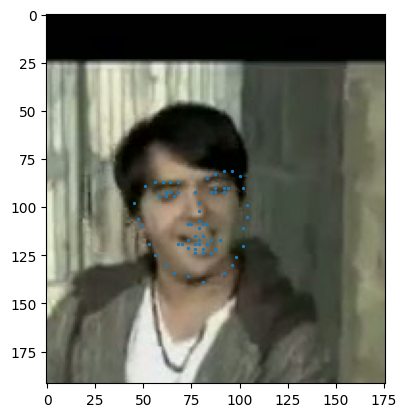

In [5]:
img_path = os.path.join('data', 'training', file_name)

plt.imshow(mpimg.imread(img_path))
plt.scatter(key_pts[:, 0], key_pts[:, 1], s=2)
plt.show()

In [6]:
class FacialKeypointsDataset(Dataset):
    def __init__(self, keypoints_file, img_dir, transform=None):
        self.keypoints_df = pd.read_csv(keypoints_file)
        self.img_dir = img_dir
        self.transform = transform

    def __len__(self):
        return len(self.keypoints_df)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.keypoints_df.iloc[idx, 0])
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGBA)
        
        if image.shape[2] == 4:
            image = image[:,:,0:3]
        
        keypoints = self.keypoints_df.iloc[idx, 1:].values.astype('float').reshape(-1, 2)
        sample = {'image': image, 'keypoints': keypoints}
        
        if self.transform:
            sample = self.transform(sample)
        return sample

In [7]:
face_dataset = FacialKeypointsDataset(keypoints_file=os.path.join('data', 'training_frames_keypoints.csv'),
                                      img_dir=os.path.join('data', 'training'))
len(face_dataset)

3462

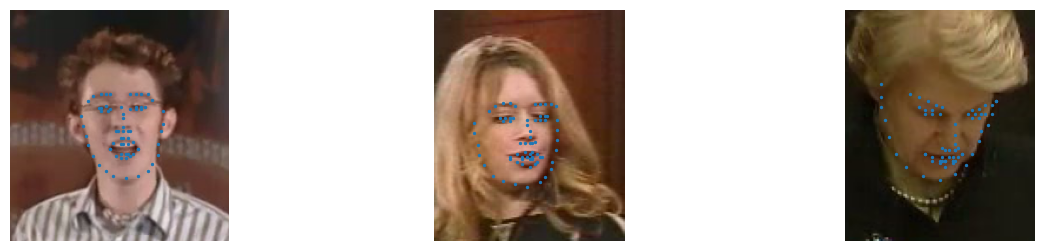

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,3))
    
for i in range(3):
    rand_value = np.random.randint(0, len(face_dataset))
    sample = face_dataset[rand_value]
    ax[i].imshow(sample['image'])
    ax[i].scatter(sample['keypoints'][:, 0], sample['keypoints'][:, 1], s=2)
    ax[i].axis('off')
plt.show()

In [9]:
class Normalize(object):   
    def __init__(self, color = False):
        self.color = color
    
    def __call__(self, sample):
        image, key_pts = sample['image'], sample['keypoints']
        
        image_copy = np.copy(image)
        key_pts_copy = np.copy(key_pts)

        if not self.color:
            image_copy = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        
        image_copy=  image_copy/255.0
            
        key_pts_copy = (key_pts_copy - image.shape[0]/2)/(image.shape[0]/4)


        return {'image': image_copy, 'keypoints': key_pts_copy}


class Rescale(object):
    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        self.output_size = output_size

    def __call__(self, sample):
        image, key_pts = sample['image'], sample['keypoints']

        h, w = image.shape[:2]
        if isinstance(self.output_size, int):
            if h > w:
                new_h, new_w = self.output_size * h / w, self.output_size
            else:
                new_h, new_w = self.output_size, self.output_size * w / h
        else:
            new_h, new_w = self.output_size
        new_h, new_w = int(new_h), int(new_w)
            
        img = cv2.resize(image, (new_w, new_h))
                 
        key_pts = key_pts * [new_w / w, new_h / h]
        
        return {'image': img, 'keypoints': key_pts}
    
class FaceCrop(object):
    def __call__(self, sample):
        image, key_pts = sample['image'], sample['keypoints']

        image_copy = np.copy(image)
        h, w = image.shape[:2]
        x_max = 0
        x_min = 10000
        y_max = 0
        y_min = 10000
        
        for coord in key_pts:
            if coord[0] > x_max:
                if coord[0] >= w:
                    x_max = w
                else:
                    x_max = coord[0]
            if coord[0] < x_min:
                if coord[0] < 0:
                    x_min = 0
                else:
                    x_min = coord[0]
            if coord[1] > y_max:
                if coord[1] >= h:
                    y_max = h
                else:
                    y_max = coord[1]
            if coord[1] < y_min:
                if coord[1] < 0:
                    y_min = 0
                else:
                    y_min = coord[1]
        
        x = int(x_min)
        y = int(y_min)
        
        new_h = int(y_max - y_min)
        new_w = int(x_max - x_min)
        
        if new_h > new_w:
            new_w = new_h
        else:
            new_h = new_w       
        
        randsize1 = [2, 70]
        randsize2 = [2, 30]
        randsize3 = [1, 10]

        padding_x_1 = 0
        padding_x_2 = 0
        padding_y_1 = 0
        padding_y_2 = 0
        
        padding_size_x_1 = random.randint(randsize1[0],randsize1[1])
        padding_size_x_2 = random.randint(randsize1[0],randsize1[1])
        padding_size_y_1 = random.randint(randsize1[0],randsize1[1])
        padding_size_y_2 = random.randint(randsize1[0],randsize1[1])
        if(y - padding_size_y_1 > 0 and x - padding_size_x_1 > 0
           and x + new_w + padding_size_x_2 < w and y + new_h + padding_size_y_2 < h):
            padding_x_1 = padding_size_x_1
            padding_x_2 = padding_size_x_2
            padding_y_1 = padding_size_y_1
            padding_y_2 = padding_size_y_2
        else:
            padding_size_x_1 = random.randint(randsize2[0],randsize2[1])
            padding_size_x_2 = random.randint(randsize2[0],randsize2[1])
            padding_size_y_1 = random.randint(randsize2[0],randsize2[1])
            padding_size_y_2 = random.randint(randsize2[0],randsize2[1])
         
            if(y - padding_size_y_1 > 0 and x - padding_size_x_1 > 0
               and x + new_w + padding_size_x_2 < w and y + new_h + padding_size_y_2 < h):
                padding_x_1 = padding_size_x_1
                padding_x_2 = padding_size_x_2
                padding_y_1 = padding_size_y_1
                padding_y_2 = padding_size_y_2
                
            else:
                padding_size_x_1 = random.randint(randsize3[0],randsize3[1])
                padding_size_x_2 = random.randint(randsize3[0],randsize3[1])
                padding_size_y_1 = random.randint(randsize3[0],randsize3[1])
                padding_size_y_2 = random.randint(randsize3[0],randsize3[1])
         
                if(y - padding_size_y_1 > 0 and x - padding_size_x_1 > 0
                   and x + new_w + padding_size_x_2 < w and y + new_h + padding_size_y_2 < h):
                    padding_x_1 = padding_size_x_1
                    padding_x_2 = padding_size_x_2
                    padding_y_1 = padding_size_y_1
                    padding_y_2 = padding_size_y_2 
        
        
        image_copy = image_copy[y - padding_y_1: y + new_h + padding_y_2, x - padding_x_1: x + new_w + padding_x_2]     
        key_pts = key_pts - [x - padding_x_1, y - padding_y_1] 
        return {'image': image_copy, 'keypoints': key_pts}

class ToTensor(object):
    def __call__(self, sample):
        image, key_pts = sample['image'], sample['keypoints']
        
        if(len(image.shape) == 2):
            image = image.reshape(image.shape[0], image.shape[1], 1)
            
        image = image.transpose((2, 0, 1))
        return {'image': torch.from_numpy(image),
                'keypoints': torch.from_numpy(key_pts)}
    
class ColorJitter(object):
    def __call__(self, sample):
        image, key_pts = sample['image'], sample['keypoints']
        
        color_jitter = transforms.ColorJitter(brightness=0.4,
                                              contrast=0.4,
                                              saturation=0.4,)
        
        image_copy = np.copy(image)
        key_pts_copy = np.copy(key_pts)
        image_copy = color_jitter(Image.fromarray(image_copy)) 
        image_copy = np.array(image_copy)
        
        return {'image': image_copy, 'keypoints': key_pts_copy}

class RandomHorizontalFlip(object):
    def __call__(self, sample):
        image, key_pts = sample['image'], sample['keypoints']
        
        image_copy = np.copy(image)
        key_pts_copy = np.copy(key_pts)
        key_pts_copy_2 = np.copy(key_pts_copy)

        if random.choice([0, 1]) <= 0.5:
            image_copy = np.fliplr(image_copy)          
            key_pts_copy[:,0] = -key_pts_copy[:, 0]
            key_pts_copy[:,0] = key_pts_copy[:, 0] + image_copy.shape[1]
            
            key_pts_copy_2 = np.copy(key_pts_copy)
            
            # mirror jawline 
            key_pts_copy_2[16] = key_pts_copy[0]
            key_pts_copy_2[15] = key_pts_copy[1]
            key_pts_copy_2[14] = key_pts_copy[2]
            key_pts_copy_2[13] = key_pts_copy[3]
            key_pts_copy_2[12] = key_pts_copy[4]
            key_pts_copy_2[11] = key_pts_copy[5]
            key_pts_copy_2[10] = key_pts_copy[6]
            key_pts_copy_2[9]  = key_pts_copy[7]
            key_pts_copy_2[8]  = key_pts_copy[8]
            key_pts_copy_2[7] = key_pts_copy[9] 
            key_pts_copy_2[6] = key_pts_copy[10] 
            key_pts_copy_2[5] = key_pts_copy[11]
            key_pts_copy_2[4] = key_pts_copy[12]
            key_pts_copy_2[3] = key_pts_copy[13]
            key_pts_copy_2[2] = key_pts_copy[14]
            key_pts_copy_2[1] = key_pts_copy[15]
            key_pts_copy_2[0]  = key_pts_copy[16]
            
            # mirror eyebrowns
            key_pts_copy_2[26] = key_pts_copy[17] 
            key_pts_copy_2[25] = key_pts_copy[18] 
            key_pts_copy_2[24] = key_pts_copy[19]
            key_pts_copy_2[23] = key_pts_copy[20]
            key_pts_copy_2[22] = key_pts_copy[21]
            key_pts_copy_2[21] = key_pts_copy[22]
            key_pts_copy_2[20] = key_pts_copy[23]
            key_pts_copy_2[19] = key_pts_copy[24]
            key_pts_copy_2[18] = key_pts_copy[25] 
            key_pts_copy_2[17] = key_pts_copy[26]
            
            # mirror nose tip
            key_pts_copy_2[35] = key_pts_copy[31] 
            key_pts_copy_2[34] = key_pts_copy[32] 
            key_pts_copy_2[33] = key_pts_copy[33]
            key_pts_copy_2[32] = key_pts_copy[34]
            key_pts_copy_2[31] = key_pts_copy[35]
            
            # mirror eyes
            key_pts_copy_2[45] = key_pts_copy[36]
            key_pts_copy_2[44] = key_pts_copy[37] 
            key_pts_copy_2[43] = key_pts_copy[38]
            key_pts_copy_2[42] = key_pts_copy[39]
            key_pts_copy_2[47] = key_pts_copy[40]
            key_pts_copy_2[46] = key_pts_copy[41] 
            key_pts_copy_2[39] = key_pts_copy[42] 
            key_pts_copy_2[38] = key_pts_copy[43]
            key_pts_copy_2[37] = key_pts_copy[44]
            key_pts_copy_2[36] = key_pts_copy[45]
            key_pts_copy_2[41] = key_pts_copy[46] 
            key_pts_copy_2[40] = key_pts_copy[47] 
   
            # mirror lips
            key_pts_copy_2[54] = key_pts_copy[48]
            key_pts_copy_2[53] = key_pts_copy[49] 
            key_pts_copy_2[52] = key_pts_copy[50]
            key_pts_copy_2[51] = key_pts_copy[51]
            key_pts_copy_2[50] = key_pts_copy[52]
            key_pts_copy_2[49] = key_pts_copy[53] 
            key_pts_copy_2[48] = key_pts_copy[54]
            
            key_pts_copy_2[59] = key_pts_copy[55]
            key_pts_copy_2[58] = key_pts_copy[56]
            key_pts_copy_2[57] = key_pts_copy[57]
            key_pts_copy_2[56] = key_pts_copy[58] 
            key_pts_copy_2[55] = key_pts_copy[59]
            
            key_pts_copy_2[64] = key_pts_copy[60]
            key_pts_copy_2[63] = key_pts_copy[61] 
            key_pts_copy_2[62] = key_pts_copy[62]
            key_pts_copy_2[61] = key_pts_copy[63]
            key_pts_copy_2[60] = key_pts_copy[64]
                 
            key_pts_copy_2[67] = key_pts_copy[65] 
            key_pts_copy_2[66] = key_pts_copy[66] 
            key_pts_copy_2[65] = key_pts_copy[67]

            
        return {'image': image_copy, 'keypoints': key_pts_copy_2}
    
class RandomRotate(object):    
    def __init__(self, rotation=30):
        self.rotation = rotation
    
    def __call__(self, sample):
        image, key_pts = sample['image'], sample['keypoints']
        
        image_copy = np.copy(image)
        key_pts_copy = np.copy(key_pts)
        
        rows = image.shape[0]
        cols = image.shape[1]
        
        M = cv2.getRotationMatrix2D((rows/2,cols/2),random.choice([-self.rotation, self.rotation]),1)
        image_copy = cv2.warpAffine(image_copy,M,(cols,rows))
                
        
        key_pts_copy = key_pts_copy.reshape((1,136))
        new_keypoints = np.zeros(136)
        
        for i in range(68):
            coord_idx = 2*i
            old_coord = key_pts_copy[0][coord_idx:coord_idx+2]
            new_coord = np.matmul(M,np.append(old_coord,1))
            new_keypoints[coord_idx] += new_coord[0]
            new_keypoints[coord_idx+1] += new_coord[1]
        
        new_keypoints = new_keypoints.reshape((68,2))
        
        return {'image': image_copy, 'keypoints': new_keypoints}

In [10]:
transform_pipeline = transforms.Compose([ColorJitter(),
                                         RandomRotate(5),
                                         RandomHorizontalFlip(),
                                         FaceCrop(),
                                         Rescale((224,224)),
                                         Normalize(),
                                         ToTensor()])

transformed_dataset = FacialKeypointsDataset(keypoints_file=os.path.join('data', 'training_frames_keypoints.csv'),
                                             img_dir=os.path.join('data', 'training'),
                                             transform=transform_pipeline)

test_dataset = FacialKeypointsDataset(keypoints_file=os.path.join('data', 'test_frames_keypoints.csv'),
                                      img_dir=os.path.join('data', 'test'),
                                      transform=transform_pipeline)

In [11]:
print('Number of images: ', len(transformed_dataset))

sample = transformed_dataset[0]
print(sample['image'].size(), sample['keypoints'].size())

Number of images:  3462
torch.Size([1, 224, 224]) torch.Size([68, 2])


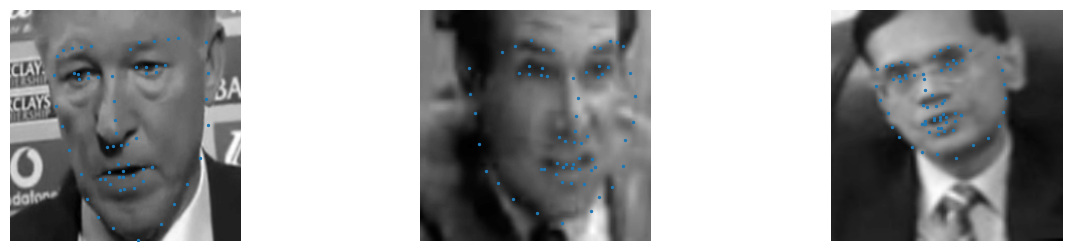

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,3))
    
for i in range(3):
    rand_value = np.random.randint(0, len(transformed_dataset))
    sample = transformed_dataset[rand_value]
    ax[i].imshow(sample['image'].numpy().transpose(1, 2, 0), cmap='gray')
    ax[i].scatter(sample['keypoints'].numpy()[:, 0]*(sample['image'].shape[1]/4)+sample['image'].shape[1]/2, 
                  sample['keypoints'].numpy()[:, 1]*(sample['image'].shape[1]/4)+sample['image'].shape[1]/2, s=2)
    ax[i].axis('off')
plt.show()

In [13]:
train_dataloader = DataLoader(transformed_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=25, shuffle=True)

# Create the Network

In [14]:
class KeypointNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.resnet18=models.resnet18(pretrained=True)
        self.resnet18.conv1=nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.resnet18.fc=nn.Linear(self.resnet18.fc.in_features, 136)
    
    def forward(self, x):
        x=self.resnet18(x)
        return x

In [15]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = KeypointNetwork().to(device)
model

C:\Users\Joe\.virtualenvs\Facial_Keypoint_Detection-xqZ4zrvx\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
C:\Users\Joe\.virtualenvs\Facial_Keypoint_Detection-xqZ4zrvx\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


KeypointNetwork(
  (resnet18): ResNet(
    (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, 

In [16]:
def evaluate_model(model, dataloader):
    model.cpu().eval()
    sample = next(iter(dataloader))
    images = sample['image']
    keypts = sample['keypoints']
    
    images = images.type(torch.FloatTensor)
    keypts = keypts.type(torch.FloatTensor)
    
    out = model(images)
    out = out.view(out.size()[0], 68, -1)
    return images, keypts, out

In [17]:
images, keypoints, keypoints_pred = evaluate_model(model, train_dataloader)

print(images.size())
print(keypoints.size())
print(keypoints_pred.size())

torch.Size([32, 1, 224, 224])
torch.Size([32, 68, 2])
torch.Size([32, 68, 2])


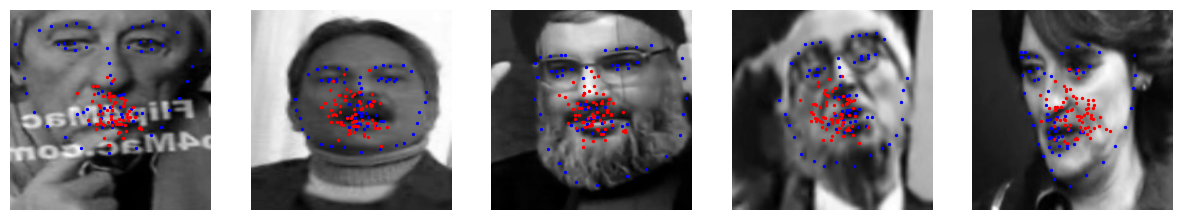

In [18]:
def visualize_outputs(images, keypoints, keypoints_pred, image_amount=None, figsize=(15,20)):
    if (not image_amount or image_amount > images.size()[0]):
        image_amount = images.size()[0]
    
    if image_amount % 5 == 0:
        nrows = image_amount // 5
    else:
        nrows = image_amount // 5 + 1
    
    fig, ax = plt.subplots(nrows=nrows, ncols=5, figsize=figsize)

    for row in range(nrows):
        for col in range(5):
            idx = row*5+col
            if idx < image_amount:
                image = images[idx]
                keypoint = keypoints[idx]
                keypt_pred = keypoints_pred[idx]
                if nrows > 1:
                    ax[row, col].imshow(image.cpu().numpy().transpose(1, 2, 0), 
                                        cmap='gray')
                    ax[row, col].scatter(keypoint.cpu().numpy()[:, 0]*(image.shape[1]/4)+image.shape[1]/2, 
                                         keypoint.cpu().numpy()[:, 1]*(image.shape[1]/4)+image.shape[1]/2, 
                                         s=2, 
                                         c='blue')
                    ax[row, col].scatter(keypt_pred.cpu().detach().numpy()[:, 0]*(image.shape[1]/4)+image.shape[1]/2, 
                                         keypt_pred.cpu().detach().numpy()[:, 1]*(image.shape[1]/4)+image.shape[1]/2, 
                                         s=2, 
                                         c='red')
                else:
                    ax[col].imshow(image.cpu().numpy().transpose(1, 2, 0), 
                                   cmap='gray')
                    ax[col].scatter(keypoint.cpu().numpy()[:, 0]*(image.shape[1]/4)+image.shape[1]/2, 
                                    keypoint.cpu().numpy()[:, 1]*(image.shape[1]/4)+image.shape[1]/2, 
                                    s=2, 
                                    c='blue')
                    ax[col].scatter(keypt_pred.cpu().detach().numpy()[:, 0]*(image.shape[1]/4)+image.shape[1]/2, 
                                    keypt_pred.cpu().detach().numpy()[:, 1]*(image.shape[1]/4)+image.shape[1]/2, 
                                    s=2, 
                                    c='red')
            if nrows > 1:
                ax[row, col].axis('off')
            else:
                ax[col].axis('off')
    plt.show()

visualize_outputs(images, keypoints, keypoints_pred, image_amount=5, figsize=(15,20))

In [19]:
model_dir = './models/'

loss_fn = nn.MSELoss()
optimizer = optim.Adam(params=model.parameters(), lr=0.001)

In [20]:
def train(model, device, train_dataloader, test_dataloader, loss_fn, optimizer, epochs):
    train_loss_history = []
    val_loss_history = []
    val_loss_min = np.Inf

    for epoch in range(epochs):
        train_loss = 0.0
        val_loss = 0.0
        
        model.to(device).train()
        for i, data in enumerate(train_dataloader):
            images = data['image'].to(device)
            key_pts = data['keypoints'].to(device)

            key_pts = key_pts.view(key_pts.size(0), -1)
            key_pts = key_pts.type(torch.cuda.FloatTensor)
            images = images.type(torch.cuda.FloatTensor)
            
            optimizer.zero_grad()
            pred_keypts = model(images)
            loss = loss_fn(pred_keypts, key_pts)
            
            loss.backward()
            optimizer.step()
            train_loss += loss.item()*images.size(0)
        train_loss_history.append(train_loss/len(train_dataloader.dataset))
        print('Training: ')
        visualize_outputs(images, key_pts.view(-1, 68, 2), pred_keypts.view(-1, 68, 2), image_amount=5, figsize=(15,20))
        
        model.to(device).eval()
        for i, data in enumerate(test_dataloader):
            images = data['image'].to(device)
            key_pts = data['keypoints'].to(device)

            key_pts = key_pts.view(key_pts.size(0), -1)
            key_pts = key_pts.type(torch.cuda.FloatTensor)
            images = images.type(torch.cuda.FloatTensor)
            
            pred_keypts = model(images)
            loss = loss_fn(pred_keypts, key_pts)
            val_loss += loss.item()*images.size(0)
        val_loss_history.append(val_loss/len(test_dataloader.dataset))
        print('Testing: ')
        visualize_outputs(images, key_pts.view(-1, 68, 2), pred_keypts.view(-1, 68, 2), image_amount=5, figsize=(15,20))
        print(f'Epoch: {epoch} -- Train Loss {train_loss/len(train_dataloader.dataset)} -- Val Loss {val_loss/len(test_dataloader.dataset)}')
        print(f'Current best val loss: {val_loss_min}')
        
        if val_loss_min > val_loss_history[-1] or val_loss_min == np.Inf:
            val_loss_min = val_loss_history[-1]
            model_name = f'keypoint_ckpt_{epoch}.pt'
            torch.save(model.state_dict(), os.path.join(model_dir, model_name))
            print('Model Saved')
        
        clear_output(wait=True)
    return train_loss_history, val_loss_history

Training: 


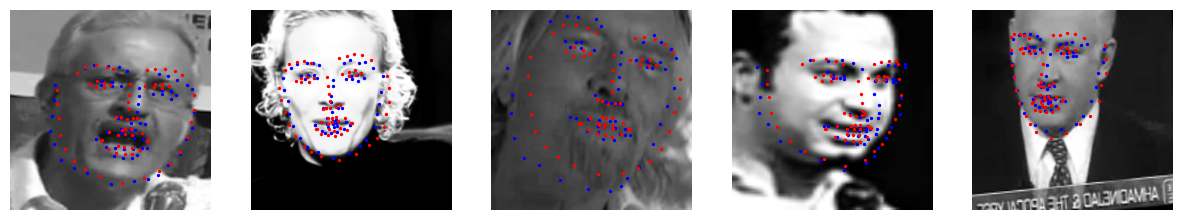

Testing: 


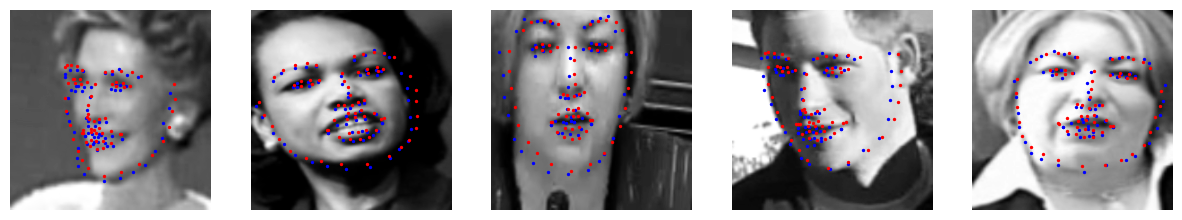

Epoch: 49 -- Train Loss 0.00849247151035611 -- Val Loss 0.00600268568710557
Current best val loss: 0.003795689750499056


In [21]:
train_loss_history, val_loss_history = train(model, device, train_dataloader, test_dataloader, loss_fn, optimizer, epochs=50)

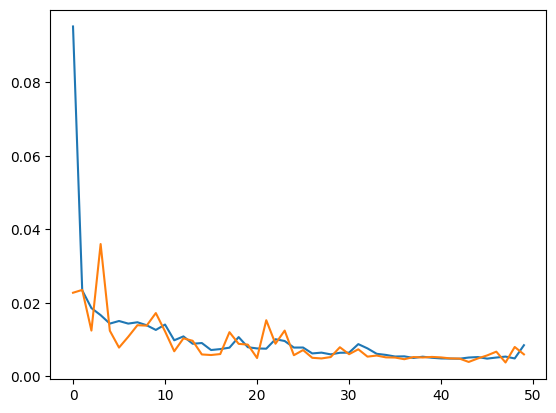

In [22]:
plt.plot(train_loss_history, label='Training loss')
plt.plot(val_loss_history, label='Validation loss')
plt.show()

In [23]:
images, keypoints, keypoints_pred = evaluate_model(model, test_dataloader)

print(images.size())
print(keypoints.size())
print(keypoints_pred.size())

torch.Size([25, 1, 224, 224])
torch.Size([25, 68, 2])
torch.Size([25, 68, 2])


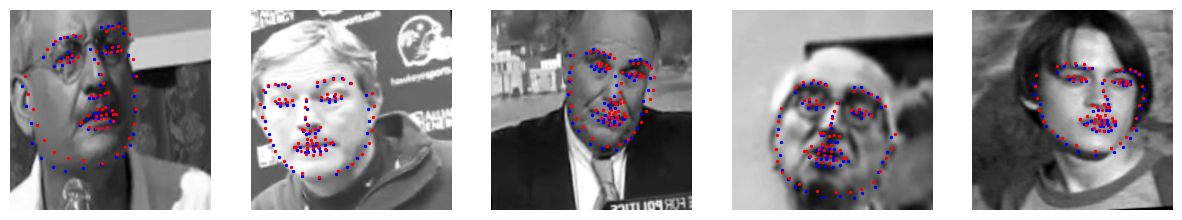

In [24]:
visualize_outputs(images, keypoints, keypoints_pred, image_amount=5, figsize=(15,20))

In [25]:
model_name = 'keypoint_model_last.pt'

torch.save(model.state_dict(), os.path.join(model_dir, model_name))

In [26]:
model.load_state_dict(torch.load(os.path.join(model_dir, model_name)))

<All keys matched successfully>

(7, 7)
[[ 0.03553729  0.05626462  0.02702245  0.12753241 -0.06742097  0.00201725
  -0.02579488]
 [-0.00288922 -0.10658312 -0.00645008  0.15480466 -0.03746433 -0.06294819
   0.12651904]
 [ 0.0246508   0.1432851  -0.11777467 -0.12264542  0.02155837  0.14108674
  -0.08675049]
 [-0.0599756  -0.10078028  0.04455748 -0.09142406  0.0208526   0.11410529
  -0.13018794]
 [-0.05001156  0.05383217 -0.0104152   0.07485706  0.05324204  0.04303151
   0.09028422]
 [-0.04410524  0.10129824  0.06484384 -0.0595552   0.03951161  0.11867197
  -0.09896082]
 [ 0.0834583   0.00617071  0.04792468 -0.03131269 -0.01659208 -0.04637355
  -0.06310037]]


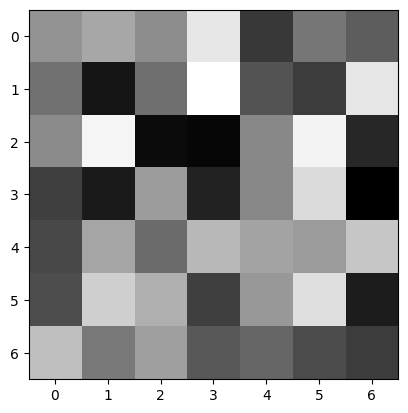

In [27]:
conv1_weights = model.resnet18.conv1.weight.data.cpu().numpy()
filter_index = 0

print(conv1_weights[filter_index][0].shape)
print(conv1_weights[filter_index][0])
plt.imshow(conv1_weights[filter_index][0], cmap='gray')
plt.show()

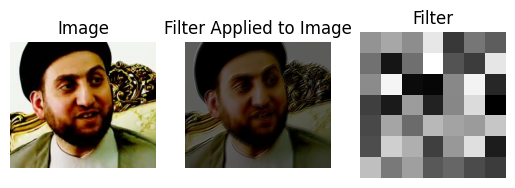

In [28]:
image = cv2.imread('./data/training/Abdel_Aziz_Al-Hakim_00.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
filter_image = cv2.filter2D(image, -1, conv1_weights[filter_index][0])

fig = plt.figure()
ax = fig.add_subplot(131)
ax.imshow(image)
ax.set_title("Image")
ax.axis('off')

ax = fig.add_subplot(132)
ax.imshow(filter_image)
ax.set_title("Filter Applied to Image")
ax.axis('off')

ax = fig.add_subplot(133)
ax.imshow(conv1_weights[filter_index][0], cmap='gray')
ax.set_title("Filter")
ax.axis('off')

plt.show()

# Facial + Keypoint Detection

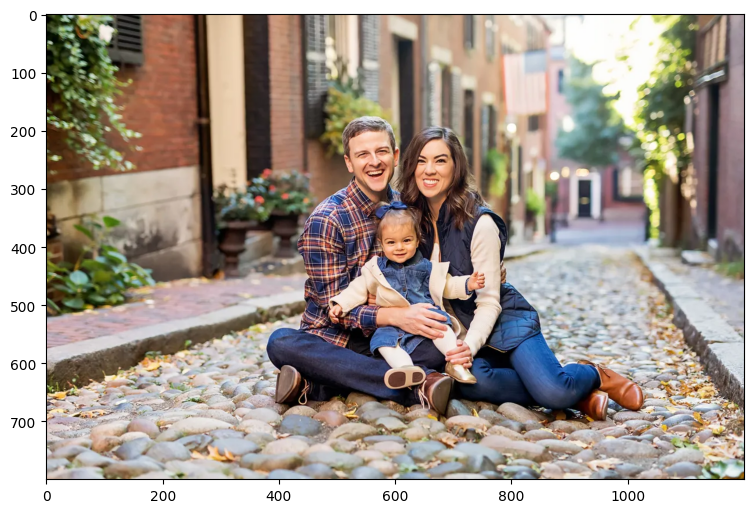

In [68]:
image = cv2.imread('images/family.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGBA)

fig = plt.figure(figsize=(9,9))
plt.imshow(image)
plt.show()

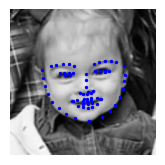

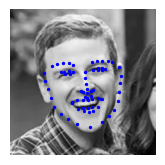

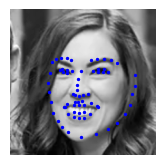

In [93]:
model.to(device).eval()
image_copy = np.copy(image)

face_cascade = cv2.CascadeClassifier('opencv_haar_models/haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(image_copy, 1.2, 3)

for i, (x,y,w,h) in enumerate(faces):
    margin = int(w*0.3)
    roi = image_copy[y-margin:y+h+margin, x-margin:x+w+margin]
    gray = cv2.cvtColor(roi, cv2.COLOR_RGB2GRAY)
    gray = gray/255.0
    gray = cv2.resize(gray,(224,224))
    gray = gray.reshape((gray.shape[0], gray.shape[1], 1))
    gray = gray.transpose((2, 0, 1))
    roiT = torch.from_numpy(gray)
    roiT = roiT.type(torch.cuda.FloatTensor)
    roiT.unsqueeze_(0)
    keypoints = model(roiT)

    fig = plt.figure()
    ax = fig.add_subplot(int(f'13{i+1}'))
    ax.imshow(roiT[0].cpu().view(224, 224, -1), cmap='gray')
    ax.scatter(keypoints.view(68, -1).cpu().detach().numpy()[:, 0]*(roiT[0].shape[1]/4)+roiT[0].shape[1]/2, 
               keypoints.view(68, -1).cpu().detach().numpy()[:, 1]*(roiT[0].shape[1]/4)+roiT[0].shape[1]/2, 
               s=2, 
               c='blue')
    ax.axis('off')
    plt.show()

# Applying Filters to Images

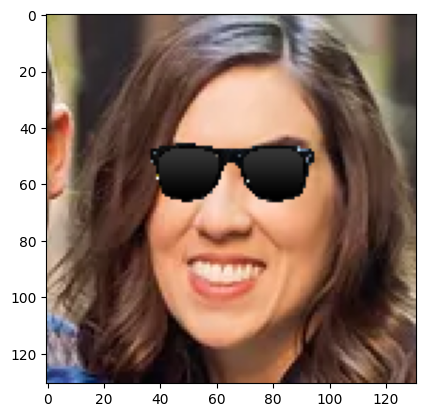

In [104]:
image_copy = roi
key_pts = keypoints.view(68, -1).cpu().detach().numpy()
key_pts[:, 0] = key_pts[:, 0]*(image_copy.shape[1]/4)+image_copy.shape[1]/2
key_pts[:, 1] = key_pts[:, 1]*(image_copy.shape[1]/4)+image_copy.shape[1]/2

x = int(key_pts[17, 0])
y = int(key_pts[17, 1])
h = int(abs(key_pts[27,1] - key_pts[34,1]))
w = int(abs(key_pts[17,0] - key_pts[26,0]))

sunglasses = cv2.imread('images/sunglasses.png', cv2.IMREAD_UNCHANGED)
new_sunglasses =  cv2.resize(sunglasses, (w, h), interpolation = cv2.INTER_CUBIC)

roi_color = image_copy[y:y+h,x:x+w]
ind = np.argwhere(new_sunglasses[:,:,3] > 0)
for i in range(3):
    roi_color[ind[:,0],ind[:,1],i] = new_sunglasses[ind[:,0],ind[:,1],i]    
image_copy[y:y+h,x:x+w] = roi_color

plt.imshow(image_copy)
plt.show()